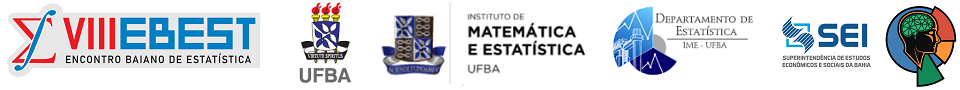

## **Entendendo o contexto**

### **O Objetivo da Aula**

Compreender a mortalidade no Brasil por meio de visualização de dados.

### **O dataset**

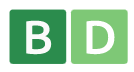

**Sistema de Informações sobre Mortalidade (SIM)**

O Sistema de Informações sobre Mortalidade (SIM) foi criado pelo DATASUS para a obtenção regular de dados sobre mortalidade no país. A partir da criação do SIM foi possível a captação de dados sobre mortalidade, de forma abrangente, para subsidiar as diversas esferas de gestão na saúde pública. Com base nessas informações é possível realizar análises de situação, planejamento e avaliação das ações e programas na área.

https://basedosdados.org/dataset/br-ms-sim?bdm_table=dicionario

## **Configurando ambiente e baixando dados da base dos dados**

In [ ]:
# Instalando a biblioteca basedosdados
!pip install basedosdados

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 50 kB 2.7 MB/s 
     |████████████████████████████████| 58 kB 5.3 MB/s 
     |████████████████████████████████| 105 kB 42.4 MB/s 
     |████████████████████████████████| 203 kB 42.5 MB/s 
     |████████████████████████████████| 133 kB 49.3 MB/s 
     |████████████████████████████████| 270 kB 51.7 MB/s 
     |████████████████████████████████| 7.5 MB 29.7 MB/s 
     |████████████████████████████████| 25.5 MB 10.2 MB/s 
     |████████████████████████████████| 9.9 MB 26.8 MB/s 
     |████████████████████████████████| 3.6 MB 38.3 MB/s 
     |████████████████████████████████| 135 kB 25.8 MB/s 
     |████████████████████████████████| 97 kB 2.0 MB/s 
     |████████████████████████████████| 108 kB 39.8 MB/s 
     |████████████████████████████████| 70 kB 6.6 MB/s 
     |████████████████████████████████| 1.1 MB 37.5 MB/s 
  Installing build dependencies ... do

In [ ]:
# Carregando a biblioteca
import basedosdados as bd

In [ ]:
# Listando os datasets disponíveis
bd.list_datasets()


dataset_id: 
	br-cvm-oferta-publica-distribuicao 
-----------------------------------------------------------------------------------------------
dataset_id: 
	br-cvm-administradores-carteira 
-----------------------------------------------------------------------------------------------
dataset_id: 
	br-bd-indicadores 
-----------------------------------------------------------------------------------------------
dataset_id: 
	nl-ug-pwt 
-----------------------------------------------------------------------------------------------
dataset_id: 
	br-bd-diretorios-mundo 
-----------------------------------------------------------------------------------------------
dataset_id: 
	br-seeg-emissoes 
-----------------------------------------------------------------------------------------------
dataset_id: 
	mundo-kaggle-olimpiadas 
-----------------------------------------------------------------------------------------------
dataset_id: 
	br-ibge-censo-demografico 
----------------------

In [ ]:
# Consultando as tabelas de um dataset
# Como exemplo vamos utilizar o dataset da PNAD
bd.list_dataset_tables(
    dataset_id='br_ms_sim', 
    with_description=True
)


table_id: 
	dicionario 
description: 
	Dicionário para a base do Sistema de Informações de Mortalidade (SIM).
 
-----------------------------------------------------------------------------------------------
table_id: 
	microdados 
description: 
	Microdados do Sistema de Informações sobre Mortalidade (SIM) do Ministério da Saúde.
 
-----------------------------------------------------------------------------------------------
table_id: 
	municipio 
description: 
	Número de óbitos agregados dos microdados do Sistema de Informações sobre Mortalidade 
do Ministério da Saúde ao nível município-ano.
 
-----------------------------------------------------------------------------------------------
table_id: 
	municipio_causa 
description: 
	Número de óbitos agregados dos microdados do Sistema de Informações sobre Mortalidade 
do Ministério da Saúde ao nível município-causa-ano.
 
-----------------------------------------------------------------------------------------------
table_id: 
	munic

In [ ]:
# Consultando as tabelas de um dataset
# Como exemplo vamos utilizar o dataset da PNAD
bd.get_table_columns(
    dataset_id = 'br_ms_sim', 
    table_id = 'municipio'
)


name: 
	ano 
bigquery_type: 
	int64 
description: 
	Ano 
temporal_coverage: 
	['(1)'] 
covered_by_dictionary: 
	no 
directory_column: 
	{'dataset_id': 'br_bd_diretorios_data_tempo', 'table_id': 'ano', 'column_name': 

measurement_unit: 
	year 
has_sensitive_data: 
	no 
observations: 
	None 
is_in_staging: 
	True 
is_partition: 
	True 
-----------------------------------------------------------------------------------------------
name: 
	sigla_uf 
bigquery_type: 
	string 
description: 
	Sigla da Unidade da Federação 
temporal_coverage: 
	['(1)'] 
covered_by_dictionary: 
	no 
directory_column: 
	{'dataset_id': 'br_bd_diretorios_brasil', 'table_id': 'uf', 'column_name': 'sigla'} 
measurement_unit: 
	None 
has_sensitive_data: 
	no 
observations: 
	None 
is_in_staging: 
	True 
is_partition: 
	True 
-----------------------------------------------------------------------------------------------
name: 
	id_municipio 
bigquery_type: 
	string 
description: 
	ID Município - IBGE 7 Dígitos 
tempo

⚠️⚠️ **Atenção!!** Perceba que conseguimos consultar a lista das bases de dados, consultar as tabelas de uma base de dados e, inclusive, consultar os atributos de uma tabela sem precisar carregar essas tabelas no ambiente. Ou seja, não utilizamos recursos de armazenamento e nem fizemos download de dados.

In [ ]:
# 1) Acesse: https://console.cloud.google.com/projectselector2/home/dashboard
# 2) Clique em Create Project/Criar Projeto. Escolha um nome bacana para o projeto.
# 3) Clique em Create/Criar

In [ ]:
# Baixando a tabela
df = bd.read_table(dataset_id='br_ms_sim',
table_id='municipio',
billing_project_id="saude-366505")


Downloading: 100%|██████████| 132868/132868 [00:04<00:00, 31514.12rows/s]


In [ ]:
# Espiando a estrutura do dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132868 entries, 0 to 132867
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   ano            132868 non-null  Int64 
 1   sigla_uf       132868 non-null  object
 2   id_municipio   132868 non-null  object
 3   numero_obitos  132868 non-null  Int64 
dtypes: Int64(2), object(2)
memory usage: 4.3+ MB


In [ ]:
# Espiando o dataframe
df.head(5)

,ano,sigla_uf,id_municipio,numero_obitos
0,1996,AC,1200000,4
1,1996,AC,1200013,9
2,1996,AC,1200054,8
3,1996,AC,1200104,46
4,1996,AC,1200138,3


In [ ]:
# Permitir o Google Colab utilizar arquivos do Google Drive
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
# Salvando o df no drive
df.to_csv(path_or_buf='/content/drive/MyDrive/Quantitativamente/EBEST2022/municipio.csv', sep=';',index=False)

In [ ]:
# Baixando a tabela municipio_causa_idade_sexo_raca
df2 = bd.read_table(dataset_id='br_ms_sim',
table_id='municipio_causa_idade_sexo_raca',
billing_project_id="saude-366505")

In [ ]:
# Salvando o df2 no drive
df2.to_csv(path_or_buf='/content/drive/MyDrive/Quantitativamente/EBEST2022/municipio_causa_idade_sexo_raca.csv', sep=';')

In [ ]:
# Baixando a tabela microdados
df3 = bd.read_table(dataset_id='br_ms_sim',
table_id='microdados',
billing_project_id="saude-366505")

Downloading:  61%|██████    | 17025284/27902869 [2:41:02<1:48:13, 1675.15rows/s]

In [ ]:
# Salvando o df no drive
df3.to_csv(path_or_buf='/content/drive/MyDrive/Quantitativamente/EBEST2022/microdados.csv', sep=';')

## **Dados agregados por municipio**

In [ ]:
import pandas as pd

In [ ]:
# Permitir o Google Colab utilizar arquivos do Google Drive
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
#Lendo o csv salvo no drive
sim_mun = pd.read_csv(
    filepath_or_buffer='/content/drive/MyDrive/Quantitativamente/EBEST2022/municipio.csv', 
    sep=';'
)

In [ ]:
# Espiando o dataframe
sim_mun.head(5)

,ano,sigla_uf,id_municipio,numero_obitos
0,1996,AC,1200000,4
1,1996,AC,1200013,9
2,1996,AC,1200054,8
3,1996,AC,1200104,46
4,1996,AC,1200138,3


In [ ]:
# Espiando a estrutura do dataframe
sim_mun.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132868 entries, 0 to 132867
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   ano            132868 non-null  int64 
 1   sigla_uf       132868 non-null  object
 2   id_municipio   132868 non-null  int64 
 3   numero_obitos  132868 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 4.1+ MB


#### **Óbitos por ano no Brasil**

In [ ]:
# Agregando obitos por ano no Brasil
obitos_por_ano = sim_mun\
  .filter(items=['ano','numero_obitos'])\
  .groupby('ano', as_index = True)\
  .sum()\
  .reset_index()

# Verificando o resultado do dataframe gerado
obitos_por_ano

,ano,numero_obitos
0,1996,908883
1,1997,903516
2,1998,931895
3,1999,938658
4,2000,946686
5,2001,961492
6,2002,982807
7,2003,1002340
8,2004,1024073
9,2005,1006827


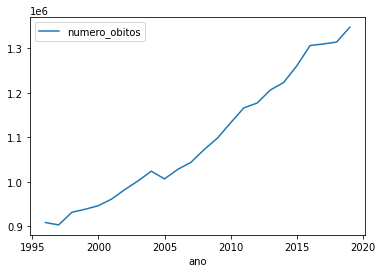

In [ ]:
# Gerando um gráfico de linhas simples
obitos_por_ano.plot.line(x = 'ano', y = 'numero_obitos');

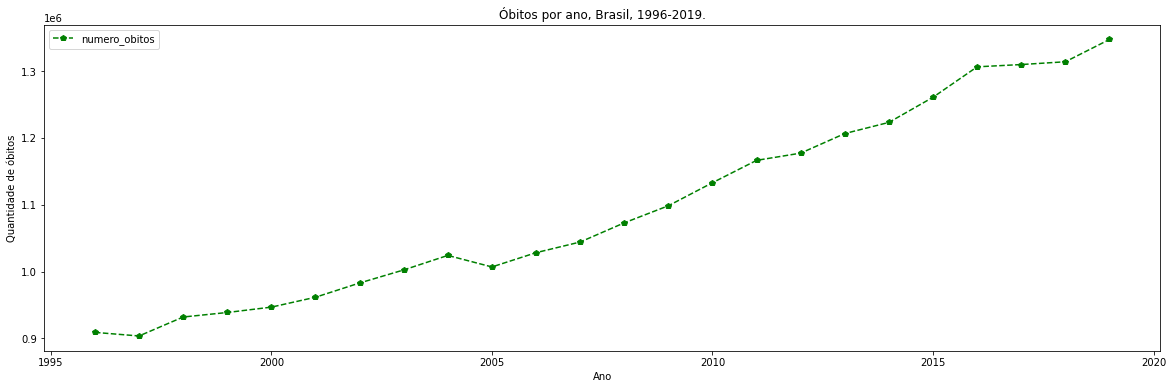

In [ ]:
# Elaborando gráfico de linhas mais elaborado
obitos_por_ano.plot.line(
    x = 'ano', 
    y = 'numero_obitos',
    color = 'green',
    marker='p',
    linestyle = '--',
    figsize=(20, 6),
    title = 'Óbitos por ano, Brasil, 1996-2019.',
    ylabel='Quantidade de óbitos',
    xlabel='Ano'
);

#### **Óbitos por UF em 2019**

In [ ]:
# Agregando obitos por UF do Brasil em 2019
obitos_por_UF = sim_mun\
  .query('ano==2019')\
  .groupby('sigla_uf', as_index = True)\
  .agg({"numero_obitos": "sum"})\
  .reset_index()

# Verificando o resultado do dataframe gerado
obitos_por_UF

,sigla_uf,numero_obitos
0,AC,4076
1,AL,20286
2,AM,18321
3,AP,3524
4,BA,93058
5,CE,56575
6,DF,12804
7,ES,24406
8,GO,40931
9,MA,35085


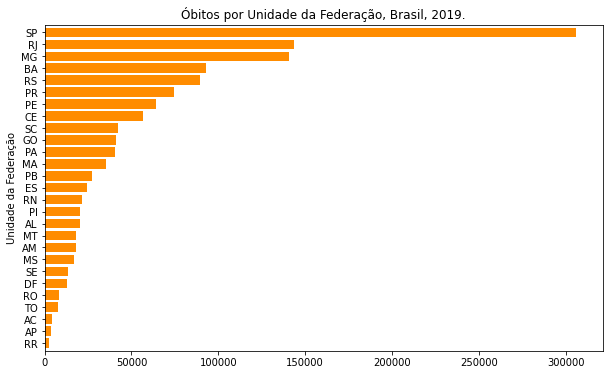

In [ ]:
# Gerando um gráfico de barras com o método plot.bar do Pandas
obitos_por_UF.sort_values('numero_obitos', ascending=True)\
  .plot.barh(
    x='sigla_uf',
    y = 'numero_obitos', 
    color = 'darkorange',
    figsize=(10, 6),
    title = 'Óbitos por Unidade da Federação, Brasil, 2019.',
    ylabel='Quantidade de óbitos',
    xlabel='Unidade da Federação',
    legend = False,
    width = 0.8
);

In [ ]:
# Importando as bibliotecas necessarias
import matplotlib.pyplot as plt

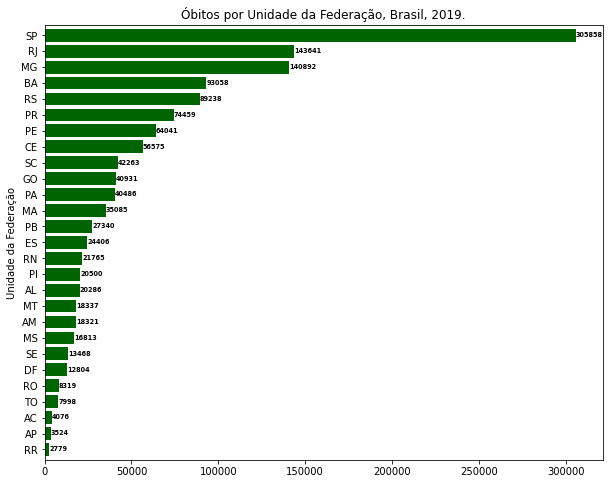

In [ ]:
# Gerando um gráfico de barras com o método plot.bar do Pandas
graf_obitos_uf = obitos_por_UF.sort_values('numero_obitos', ascending=True)\
  .plot.barh(
    x='sigla_uf',
    y = 'numero_obitos', 
    color = 'darkgreen',
    figsize=(10, 8),
    title = 'Óbitos por Unidade da Federação, Brasil, 2019.',
    ylabel='Quantidade de óbitos',
    xlabel='Unidade da Federação',
    legend = False,
    width = 0.8
)
  
# Adicionando rótulo de valores
for i in graf_obitos_uf.patches:
    plt.text(
        y = i.get_y()+0.3, 
        x = i.get_width(),
        s = str(i.get_width()),
       fontsize = 6.5, 
       fontweight ='bold',
       color ='black'
    );  

Se fosse um gráfico de colunas usaria get_height() no lugar de get_width() e get_x() em vez de get_y()

#### **Mapa dos Óbitos por UF em 2019**

##### **1. Organização dos dados geoespaciais**

In [ ]:
#Instalando o Geopandas
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 5.3 MB/s 
     |████████████████████████████████| 6.3 MB 36.9 MB/s 
     |████████████████████████████████| 16.7 MB 528 kB/s 


In [ ]:
# Importando bibliotecas necessárias
import geopandas as gpd
import json

In [ ]:
# Pegando o geojson
url_geojson = 'https://raw.githubusercontent.com/jonates/opendata/master/arquivos_geoespaciais/unidades_da_federacao.json'
geo_uf = gpd.read_file(url_geojson)

In [ ]:
# Espiando a estrutura do objeto
geo_uf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   NM_ESTADO  27 non-null     object  
 1   NM_REGIAO  27 non-null     object  
 2   CD_GEOCUF  27 non-null     object  
 3   geometry   27 non-null     geometry
dtypes: geometry(1), object(3)
memory usage: 992.0+ bytes


In [ ]:
#Espiando o objeto geoespacial
geo_uf.head()

,NM_ESTADO,NM_REGIAO,CD_GEOCUF,geometry
0,ACRE,NORTE,12,"POLYGON ((-66.81025 -9.81805, -66.62672 -9.898..."
1,ALAGOAS,NORDESTE,27,"POLYGON ((-35.15253 -8.91384, -35.30432 -9.190..."
2,AMAPÁ,NORTE,16,"POLYGON ((-50.09391 0.70209, -50.27176 0.68823..."
3,AMAZONAS,NORTE,13,"POLYGON ((-63.37209 2.21186, -63.27635 2.15439..."
4,BAHIA,NORDESTE,29,"POLYGON ((-38.23759 -9.32979, -38.23654 -9.331..."


##### **2. Organização do dataframe**

In [ ]:
# Espiando o df com dados de óbitos por UF em 2019
obitos_por_UF.head(5)

,sigla_uf,numero_obitos,CD_GEOCUF
0,AC,4076,12
1,AL,20286,27
2,AM,18321,13
3,AP,3524,16
4,BA,93058,29


In [ ]:
# Inserindo o codigo da UF no dataset
obitos_por_UF['CD_GEOCUF'] = obitos_por_UF['sigla_uf']\
  .replace(
      ['RO','AC','AM','RR','PA','AP','TO','MA','PI','CE','RN','PB','PE','AL','SE','BA','MG','ES','RJ','SP','PR','SC','RS','MS','MT','GO','DF'],
      ['11','12','13','14','15','16','17','21','22','23','24','25','26','27','28','29','31','32','33','35','41','42','43','50','51','52','53']
  )

# Espiando a tabela
obitos_por_UF.head(5)  

,sigla_uf,numero_obitos,CD_GEOCUF
0,AC,4076,12
1,AL,20286,27
2,AM,18321,13
3,AP,3524,16
4,BA,93058,29


In [ ]:
# Levando os dados para dentro do objeto geoespacial
geo_uf = geo_uf.merge(obitos_por_UF, on='CD_GEOCUF')

#Espiando resultado
geo_uf.head()

,NM_ESTADO,NM_REGIAO,CD_GEOCUF,geometry,sigla_uf,numero_obitos
0,ACRE,NORTE,12,"POLYGON ((-66.81025 -9.81805, -66.62672 -9.898...",AC,4076
1,ALAGOAS,NORDESTE,27,"POLYGON ((-35.15253 -8.91384, -35.30432 -9.190...",AL,20286
2,AMAPÁ,NORTE,16,"POLYGON ((-50.09391 0.70209, -50.27176 0.68823...",AP,3524
3,AMAZONAS,NORTE,13,"POLYGON ((-63.37209 2.21186, -63.27635 2.15439...",AM,18321
4,BAHIA,NORDESTE,29,"POLYGON ((-38.23759 -9.32979, -38.23654 -9.331...",BA,93058


In [ ]:
# Verificando mínimo e máximo para definir range do mapa
obitos_por_UF.numero_obitos.describe()

count        27.000000
mean      49898.629630
std       64068.834089
min        2779.000000
25%       15140.500000
50%       24406.000000
75%       60308.000000
max      305858.000000
Name: numero_obitos, dtype: float64

##### **3. Elaboração do Mapa**

In [ ]:
# Importando as bibliotecas necessarias
import folium

In [ ]:
# Criando o mapa base
mapa_uf = folium.Map(
    width=800, 
    height=600, 
    location=[-12.97, -38.51], 
    zoom_start=4, 
    tiles="cartodbpositron"
)

# Visualizando o mapa base
mapa_uf

In [ ]:
# Criando a camada Choroplet
mapa = folium.Choropleth(
    geo_data = geo_uf,
    name ='choropleth',
    data = obitos_por_UF,
    columns=['CD_GEOCUF', 'numero_obitos'],
    key_on='feature.properties.CD_GEOCUF',
    fill_color='Greens',
    fill_opacity=0.7,
    line_opacity=0.9,
    legend_name='Óbitos por Unidade da Federação, Brasil, 2019',
    highlight = True,
    reset=True 
).add_to(mapa_uf)

# Renderizando o mapa
mapa_uf

In [ ]:
# Inserindo os rotulos ao passar o mouse
mapa.geojson.add_child(
  folium.features.GeoJsonTooltip(
      fields=['NM_ESTADO', 'numero_obitos'],
      aliases=['Unidade da Federação:', 'Óbitos:'],
      labels=True,
      localize=True,
      sticky=False,
  )
)

# Exibindo o mapa
mapa_uf

## **Dados agregados por municipio, causa, idade, sexo, raca e ano**

In [ ]:
import pandas as pd

In [ ]:
# Permitir o Google Colab utilizar arquivos do Google Drive
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
#Lendo o csv salvo no drive
sim = pd.read_csv(
    filepath_or_buffer='/content/drive/MyDrive/Quantitativamente/EBEST2022/municipio_causa_idade_sexo_raca.csv', 
    sep=';'
)

In [ ]:
# Espiando o dataframe
sim.head(3)

,Unnamed: 0,ano,sigla_uf,id_municipio,causa_basica,idade,sexo,raca_cor,numero_obitos
0,0,2019,PE,2610707,I219,49.0,1.0,4.0,1
1,1,2019,PE,2610707,I710,72.0,2.0,2.0,1
2,2,2019,PE,2610707,J159,48.0,1.0,4.0,1


In [ ]:
# Espiando a estrutura do dataframe
sim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22618604 entries, 0 to 22618603
Data columns (total 9 columns):
 #   Column         Dtype  
---  ------         -----  
 0   Unnamed: 0     int64  
 1   ano            int64  
 2   sigla_uf       object 
 3   id_municipio   int64  
 4   causa_basica   object 
 5   idade          float64
 6   sexo           float64
 7   raca_cor       float64
 8   numero_obitos  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 1.5+ GB


In [ ]:
# Gerando Tabela de frequência das causas de mortes
sim.causa_basica.value_counts(normalize=True)

I219    5.424650e-02
R98     3.846603e-02
I64     3.728272e-02
R99     3.050140e-02
J189    2.484645e-02
            ...     
D562    4.421139e-08
V663    4.421139e-08
X417    4.421139e-08
O332    4.421139e-08
X118    4.421139e-08
Name: causa_basica, Length: 8581, dtype: float64

In [ ]:
# Gerando Tabela de frequência das causas de mortes
# Transformando num dataframe
tab_causas_mortes = sim\
  .groupby('causa_basica', as_index = True)\
  .agg({"numero_obitos": "sum"})\
  .sort_values('numero_obitos', ascending=False)\
  .reset_index()

# Espiando o dataframe resultante
tab_causas_mortes.head(20)

,causa_basica,numero_obitos
0,I219,1752847
1,R98,1048603
2,I64,1028021
3,R99,901727
4,J189,735421
5,E149,563627
6,J449,477645
7,C349,472431
8,I10,417582
9,X954,348625


#### **Óbitos em decorrência de câncer de mama por ano no Brasil**

https://www.medicinanet.com.br/cid10/1303/c50_neoplasia_maligna_da_mama.htm

In [ ]:
# Definindo lista de CID associada a neoplasia maligna da mama 
list_cid_cm = ['C50','C500','C501','C502','C503','C504','C505','C506','C507','C508','C509']

# Filtrando os dados do SIM para causas básicas associado ao CID50
ocm = sim.query("causa_basica in @list_cid_cm")

# Espiando o df resultante
ocm

,Unnamed: 0,ano,sigla_uf,id_municipio,causa_basica,idade,sexo,raca_cor,numero_obitos
27,27,2019,PE,2611606,C509,67.0,2.0,2.0,1
28,28,2019,PE,2611606,C509,93.0,2.0,4.0,1
265,265,2017,PA,1505403,C509,87.0,2.0,4.0,1
341,341,2015,CE,2311603,C509,47.0,2.0,1.0,1
471,471,2018,PE,2613008,C509,57.0,2.0,1.0,1
...,...,...,...,...,...,...,...,...,...
22618132,22618132,2015,SP,3504107,C509,93.0,2.0,1.0,1
22618209,22618209,2015,SP,3509502,C509,49.0,2.0,1.0,2
22618485,22618485,2011,SP,3504503,C509,74.0,2.0,1.0,1
22618549,22618549,2011,SP,3508603,C509,52.0,2.0,4.0,1


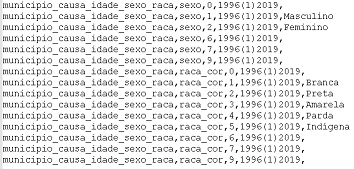

In [ ]:
# Inserindo os labels na variavel sexo
ocm['sexo_label'] = ocm['sexo'].replace([1,2,0,9],['Masculino','Feminino','Outros','Outros']);

# Inserindo os labels na variavel raca_cor
ocm['raca_cor_label'] = ocm['raca_cor']\
  .replace([1,2,3,4,5],['Branca','Preta','Amarela','Parda','Indigena']);

# Espiando o df resultante
ocm.head(5)  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Unnamed: 0,ano,sigla_uf,id_municipio,causa_basica,idade,sexo,raca_cor,numero_obitos,sexo_label,raca_cor_label
27,27,2019,PE,2611606,C509,67.0,2.0,2.0,1,Feminino,Preta
28,28,2019,PE,2611606,C509,93.0,2.0,4.0,1,Feminino,Parda
265,265,2017,PA,1505403,C509,87.0,2.0,4.0,1,Feminino,Parda
341,341,2015,CE,2311603,C509,47.0,2.0,1.0,1,Feminino,Branca
471,471,2018,PE,2613008,C509,57.0,2.0,1.0,1,Feminino,Branca


In [ ]:
# Apagando as colunas que não serão utilizadas
ocm = ocm.drop(columns=['Unnamed: 0','sexo','raca_cor'], axis=1)

# Espiando o df resultante
ocm.head(5)  

,ano,sigla_uf,id_municipio,causa_basica,idade,numero_obitos,sexo_label,raca_cor_label
27,2019,PE,2611606,C509,67.0,1,Feminino,Preta
28,2019,PE,2611606,C509,93.0,1,Feminino,Parda
265,2017,PA,1505403,C509,87.0,1,Feminino,Parda
341,2015,CE,2311603,C509,47.0,1,Feminino,Branca
471,2018,PE,2613008,C509,57.0,1,Feminino,Branca


##### **Óbitos decorrente câncer de mama por sexo no Brasil em 2019**

In [ ]:
# Importando as bibliotecas necessarias
import plotly.express as px

In [ ]:
# Criando a tabela com distribuição dos óbitos por sexo
tab_sexo = ocm.query('ano==2019')\
  .groupby('sexo_label', as_index = True)\
  .agg({"numero_obitos": "sum"})\
  .sort_values('numero_obitos', ascending=False)\
  .reset_index()

# Espiando o dataframe resultante
tab_sexo

,sexo_label,numero_obitos
0,Feminino,18063
1,Masculino,227
2,Outros,1


In [ ]:
# Calculando porcentagem
tab_sexo['pct'] = (tab_sexo['numero_obitos'])\
                        .div(tab_sexo['numero_obitos'].sum()) \
                        .mul(100)\
                        .round(2)

# Espiando o resultado
tab_sexo

,sexo_label,numero_obitos,pct
0,Feminino,18063,98.75
1,Masculino,227,1.24
2,Outros,1,0.01


In [ ]:
 # Construindo o Gráfico de pizza
px.pie(
    data_frame = tab_sexo, 
    values='pct', 
    names='sexo_label', 
    title='Óbitos por neoplasia maligna da mama, por sexo, Brasil, 2019.'
)

In [ ]:
 # Construindo o Gráfico de pizza
px.pie(
    data_frame = tab_sexo, 
    values='pct', 
    names='sexo_label', 
    title='Óbitos por neoplasia maligna da mama, por sexo, Brasil, 2019.',
    color_discrete_sequence = px.colors.sequential.Sunsetdark
)

In [ ]:
 # Construindo o Gráfico de pizza
px.pie(
    data_frame = tab_sexo, 
    title='Óbitos por neoplasia maligna da mama, por sexo, Brasil, 2019.',
    values='pct', 
    names='sexo_label', 
    color = 'sexo_label',
    color_discrete_map = { 
      'Feminino' : 'darkorange' , 
      'Masculino' : 'darkblue',
      'Outros' : 'grey'
    }
)

In [ ]:
 # Construindo o Gráfico de pizza
px.pie(
    data_frame = tab_sexo, 
    title='Óbitos por neoplasia maligna da mama, por sexo, Brasil, 2019.',
    values='pct', 
    names='sexo_label', 
    color = 'sexo_label',
    color_discrete_map = { 
      'Feminino' : 'darkgreen' , 
      'Masculino' : 'lightgray',
      'Outros' : 'red'
    },
    labels={'sexo_label':'Sexo'},
    opacity = 1,
    width=600, 
    height=400
)

In [ ]:
# Construindo o Gráfico de pizza
px.pie(
    data_frame = tab_sexo, 
    title = '<b>Óbitos por neoplasia maligna da mama, por sexo</b><br>Brasil, 2019.',
    values='pct', 
    names='sexo_label', 
    color = 'sexo_label',
    color_discrete_map = { 
      'Feminino' : 'darkgreen' , 
      'Masculino' : 'lightgray', 
      'Outros' : 'red'
    },
    labels={'sexo_label':'Sexo'},
    opacity = 1,
    width=800, 
    height=600,
    hole=.5
)

##### **Óbitos decorrente câncer de mama por Raça/Cor no Brasil em 2019**

In [ ]:
# Criando a tabela com distribuição dos óbitos por raca_cor
tab_raca_cor = ocm.query('ano==2019')\
  .groupby('raca_cor_label', as_index = True)\
  .agg({"numero_obitos": "sum"})\
  .reset_index()

# Espiando o dataframe resultante
tab_raca_cor

,raca_cor_label,numero_obitos
0,Amarela,95
1,Branca,10517
2,Indigena,19
3,Parda,5799
4,Preta,1436


In [ ]:
# Calculando porcentagem
tab_raca_cor['pct'] = (tab_raca_cor['numero_obitos'])\
                        .div(tab_raca_cor['numero_obitos'].sum()) \
                        .mul(100)\
                        .round(2)

# Espiando o resultado
tab_raca_cor

,raca_cor_label,numero_obitos,pct
0,Amarela,95,0.53
1,Branca,10517,58.87
2,Indigena,19,0.11
3,Parda,5799,32.46
4,Preta,1436,8.04


In [ ]:
# Importando de forma explícitas as bibliotecas
import bokeh.io
import bokeh.plotting

# Habilitando a visualização de gráficos gerados pelo Bokeh em Notebooks
bokeh.io.output_notebook()

In [ ]:
# Definindo configurações principais do gráficos
graf_raca_cor = bokeh.plotting.figure(
    title="Óbitos por neoplasia maligna da mama, por Raça/Cor, Brasil, 2019.",
    width=600,
    height=400,
    x_axis_label="Raça/Cor",
    y_axis_label="Óbitos (em %)",
    x_range = tab_raca_cor['raca_cor_label'],
    y_range= (0, 65)
)

# Elaborando o gráfico de barras
graf_raca_cor.vbar(
    source = tab_raca_cor,
    x = 'raca_cor_label', #tab_raca_cor['raca_cor_label'], 
    top = 'pct', #tab_raca_cor['pct'],
    width  = 0.8, 
    line_color="darkblue", 
    line_width=2,
    fill_color="blue"
)

# Inserindo textos
graf_raca_cor.text(
    x = tab_raca_cor['raca_cor_label'], 
    y = tab_raca_cor['pct'], 
    text = tab_raca_cor['pct'],
    text_font_style = 'bold',
    text_color = "darkblue",
    text_font_size = {'value': '12px'}
)

# Exibindo o gráfico de linhas com os marcadores
bokeh.io.show(graf_raca_cor)

In [ ]:
# Ordenando a tabela
tab_raca_cor = tab_raca_cor.sort_values('numero_obitos')

# Definindo configurações principais do gráficos
graf_raca_cor2 = bokeh.plotting.figure(
    title="Óbitos por neoplasia maligna da mama, por Raça/Cor, Brasil, 2019.",
    width=600,
    height=400,
    y_axis_label="Raça/Cor",
    x_axis_label="Óbitos (em %)",
    x_range = (0, 65),
    y_range= tab_raca_cor['raca_cor_label']
)


# Elaborando o gráfico de barras
graf_raca_cor2.hbar(
    source = tab_raca_cor,
    y = 'raca_cor_label', #tab_raca_cor['raca_cor_label'], 
    right = 'pct', #tab_raca_cor['pct'],
    height  = 0.9, 
    line_color="darkgreen", 
    line_width=2,
    fill_color="green"
)

# Inserindo textos
graf_raca_cor2.text(
    y = tab_raca_cor['raca_cor_label'], 
    x = tab_raca_cor['pct']+0.2, 
    text = tab_raca_cor['pct'],
    text_font_style = 'bold',
    text_color = "darkgreen",
    text_font_size = {'value': '12px'}
)


# Exibindo o gráfico de linhas com os marcadores
bokeh.io.show(graf_raca_cor2)

##### **Óbitos decorrente câncer de mama por Causa no Brasil em 2019**

In [ ]:
# Inserindo os labels da causa
ocm['causa_basica_label'] = ocm['causa_basica']\
  .replace(
    ['C500','C501','C502','C503','C504','C505','C506','C508','C509'],
    ['mamilo e aréola','porção central da mama','quadrante superior interno da mama','quadrante inferior interno da mama','quadrante superior externo da mama','quadrante inferior externo da mama','porção axilar da mama','mama com lesão invasiva','mama, não especificada']
  );

# Espiando o df resultante
ocm.head(5)  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Unnamed: 0,ano,sigla_uf,id_municipio,causa_basica,idade,sexo,raca_cor,numero_obitos,sexo_label,raca_cor_label,causa_basica_label
27,27,2019,PE,2611606,C509,67.0,2.0,2.0,1,Feminino,Preta,"mama, não especificada"
28,28,2019,PE,2611606,C509,93.0,2.0,4.0,1,Feminino,Parda,"mama, não especificada"
265,265,2017,PA,1505403,C509,87.0,2.0,4.0,1,Feminino,Parda,"mama, não especificada"
341,341,2015,CE,2311603,C509,47.0,2.0,1.0,1,Feminino,Branca,"mama, não especificada"
471,471,2018,PE,2613008,C509,57.0,2.0,1.0,1,Feminino,Branca,"mama, não especificada"


In [ ]:
# Criando a tabela com distribuição dos óbitos por raca_cor
tab_causa = ocm.query('ano==2019')\
  .groupby('causa_basica_label', as_index = True)\
  .agg({"numero_obitos": "sum"})\
  .sort_values('numero_obitos')\
  .reset_index()

# Calculando porcentagem
tab_causa['pct'] = (tab_causa['numero_obitos'])\
                        .div(tab_causa['numero_obitos'].sum()) \
                        .mul(100)\
                        .round(2)

# Espiando o resultado
tab_causa

,causa_basica_label,numero_obitos,pct
0,porção axilar da mama,12,0.07
1,quadrante inferior interno da mama,13,0.07
2,quadrante inferior externo da mama,14,0.08
3,quadrante superior interno da mama,16,0.09
4,quadrante superior externo da mama,29,0.16
5,porção central da mama,53,0.29
6,mamilo e aréola,135,0.74
7,mama com lesão invasiva,991,5.42
8,"mama, não especificada",17028,93.09


In [ ]:
# Importando as bibliotecas necessarias
import altair as alt

In [ ]:
# Definindo as barras
bars = alt.Chart(
    data=tab_causa,
    height=600, 
    title = 'Óbitos por neoplasia maligna da mama, por Raça/Cor, Brasil, 2019.'
  ).mark_bar()\
  .encode(
    x=alt.X(
    shorthand = "pct:Q", 
    axis = alt.Axis(title = 'Óbito (em %))')
    ), 
    y=alt.Y(
        shorthand = "causa_basica_label:O", 
        sort='-x', 
        axis = alt.Axis(title = 'Causa do óbito: Neoplasia Maligna da')
  )    
)

# Definindo os rótulos
text = bars.mark_text(
    align='left',
    baseline='middle',
    dx=4
  ).encode(text='pct:Q')

# Fazendo o gráfico de barras
(bars + text)\
  .configure_mark(opacity=0.9,color='deeppink')

alt.LayerChart(...)

##### **Óbitos decorrente câncer de mama no Brasil em 1996-2019**

In [ ]:
# Criando a tabela com distribuição dos óbitos por raca_cor
tab_causa_ano = ocm\
  .groupby('ano', as_index = True)\
  .agg({"numero_obitos": "sum"})\
  .reset_index()

# Espiando o resultado
tab_causa_ano

,ano,numero_obitos
0,1996,7163
1,1997,7664
2,1998,8050
3,1999,8174
4,2000,8393
5,2001,8743
6,2002,9082
7,2003,9414
8,2004,9876
9,2005,10270


In [ ]:
# Fazendo gráfico de área
alt.Chart(data = tab_causa_ano) \
 .mark_area(
    line={'color':'purple'},
    color=alt.Gradient(
        gradient='linear',
        stops=[alt.GradientStop(color='white', offset=0),
               alt.GradientStop(color='pink', offset=1)],
        x1=1,
        x2=1,
        y1=1,
        y2=0
    )
).encode(
    x=alt.X(
    shorthand = 'ano:T', 
    axis = alt.Axis(title = 'Ano')
    ), 
    y=alt.Y(
        shorthand = 'numero_obitos:Q', 
        sort='-x', 
        axis = alt.Axis(title = 'Óbitos')
    )
).properties(width=600, height=400, title = 'Óbitos por neoplasia maligna da mama, Brasil, 1996-2019')

alt.Chart(...)

##### **Óbitos decorrente câncer de mama por idade no Brasil em 2019**

In [ ]:
# Importando as bibliotecas necessarias
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
ocm.tail(20)

,Unnamed: 0,ano,sigla_uf,id_municipio,causa_basica,idade,sexo,raca_cor,numero_obitos,sexo_label,raca_cor_label,causa_basica_label
22616759,22616759,2002,SP,3503208,C509,55.0,2.0,1.0,2,Feminino,Branca,"mama, não especificada"
22616835,22616835,2002,SP,3508504,C509,53.0,2.0,4.0,1,Feminino,Parda,"mama, não especificada"
22616947,22616947,2006,SP,3503208,C509,76.0,2.0,1.0,1,Feminino,Branca,"mama, não especificada"
22617027,22617027,2006,SP,3508603,C508,69.0,2.0,1.0,1,Feminino,Branca,mama com lesão invasiva
22617116,22617116,2003,SP,3502804,C509,69.0,2.0,1.0,1,Feminino,Branca,"mama, não especificada"
22617190,22617190,2003,SP,3508603,C509,68.0,2.0,1.0,1,Feminino,Branca,"mama, não especificada"
22617284,22617284,1999,SP,3504008,C509,67.0,2.0,1.0,1,Feminino,Branca,"mama, não especificada"
22617356,22617356,1999,SP,3509502,C509,71.0,2.0,1.0,3,Feminino,Branca,"mama, não especificada"
22617528,22617528,2009,SP,3506805,C509,41.0,2.0,1.0,1,Feminino,Branca,"mama, não especificada"
22617636,22617636,2017,SP,3503307,C509,63.0,1.0,1.0,1,Masculino,Branca,"mama, não especificada"


In [ ]:
# Definindo função para repetir registros
def reindex_df(df, weight_col):
    df = df.reindex(df.index.repeat(df[weight_col]))
    df.reset_index(drop=True, inplace=True)
    return(df)

In [ ]:
# Refazendo o dataframe repetindo as idades
ocm_desagregado = reindex_df(ocm, weight_col = 'numero_obitos')
ocm_desagregado.tail(20)

,Unnamed: 0,ano,sigla_uf,id_municipio,causa_basica,idade,sexo,raca_cor,numero_obitos,sexo_label,raca_cor_label,causa_basica_label
286858,22617027,2006,SP,3508603,C508,69.0,2.0,1.0,1,Feminino,Branca,mama com lesão invasiva
286859,22617116,2003,SP,3502804,C509,69.0,2.0,1.0,1,Feminino,Branca,"mama, não especificada"
286860,22617190,2003,SP,3508603,C509,68.0,2.0,1.0,1,Feminino,Branca,"mama, não especificada"
286861,22617284,1999,SP,3504008,C509,67.0,2.0,1.0,1,Feminino,Branca,"mama, não especificada"
286862,22617356,1999,SP,3509502,C509,71.0,2.0,1.0,3,Feminino,Branca,"mama, não especificada"
286863,22617356,1999,SP,3509502,C509,71.0,2.0,1.0,3,Feminino,Branca,"mama, não especificada"
286864,22617356,1999,SP,3509502,C509,71.0,2.0,1.0,3,Feminino,Branca,"mama, não especificada"
286865,22617528,2009,SP,3506805,C509,41.0,2.0,1.0,1,Feminino,Branca,"mama, não especificada"
286866,22617636,2017,SP,3503307,C509,63.0,1.0,1.0,1,Masculino,Branca,"mama, não especificada"
286867,22617662,2017,SP,3505708,C509,55.0,2.0,4.0,1,Feminino,Parda,"mama, não especificada"


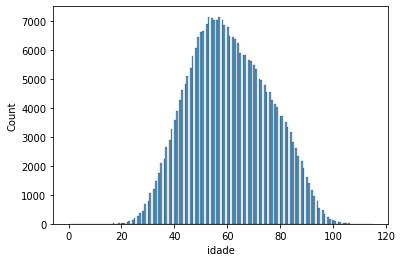

In [ ]:
# Elaborando um histograma da idade
sns.histplot(data = ocm_desagregado,  x = 'idade');

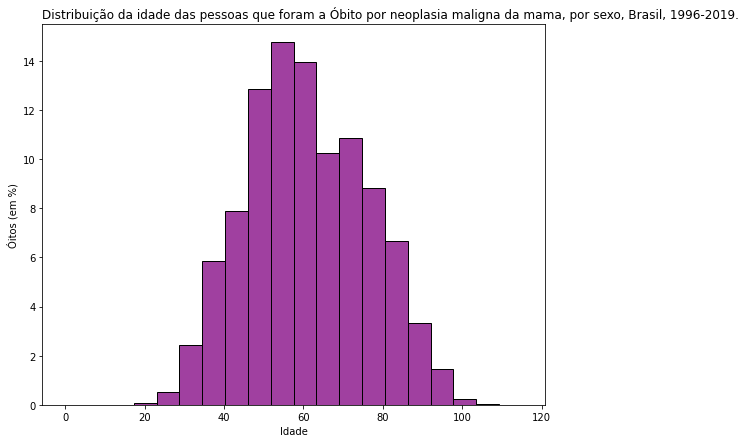

In [ ]:
# Elaborando um gráfico histograma com ajustes

# Definindo o tamanho da figura
fig, ax = plt.subplots(figsize =(9, 7))

# Fazendo o gráfico de Colunas
ax = sns.histplot(
    data=ocm_desagregado, 
    x = 'idade', 
    stat = 'percent', 
    bins = 20, 
    color = 'purple'
);

# Inserindo o título
ax.set_title(
  label = 'Distribuição da idade das pessoas que foram a Óbito por neoplasia maligna da mama, por sexo, Brasil, 1996-2019.', 
  loc ='left'
);

# Inserindo titulos dos eixos
plt.xlabel("Idade");
plt.ylabel("Óitos (em %)");

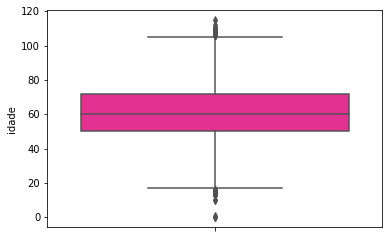

In [ ]:
# Desenhando o Boxplot da idade
sns.boxplot(data = ocm_desagregado, y="idade", color = 'deeppink');

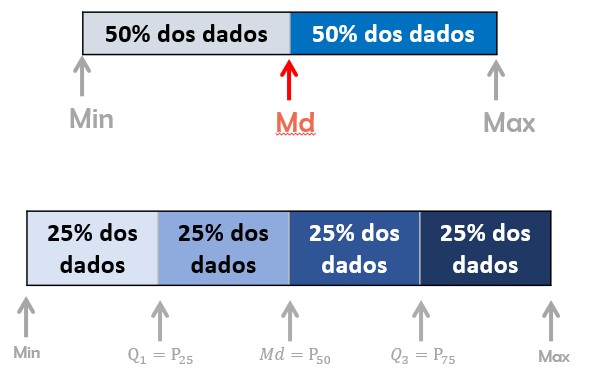

In [ ]:
# Calculando algumas estatísticas descritivas da idade
ocm_desagregado.idade.describe()

count    286794.000000
mean         60.781945
std          15.152433
min           0.000000
25%          50.000000
50%          60.000000
75%          72.000000
max         115.000000
Name: idade, dtype: float64

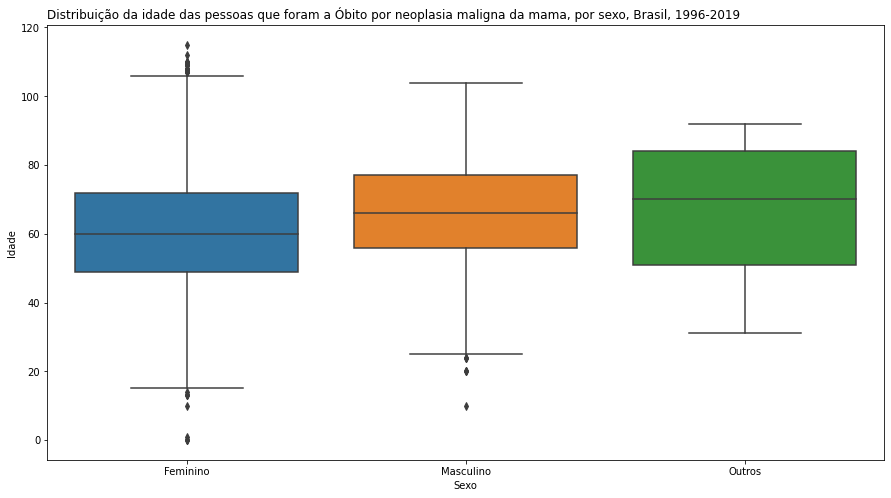

In [ ]:
# Definindo o tamanho da figura
fig, ax = plt.subplots(figsize =(15, 8))

# Desenhando o Boxplot
ax = sns.boxplot(
    data = ocm_desagregado,
    x="sexo_label", 
    y="idade" 
)

# Inserindo o título
ax.set_title(
    label = 'Distribuição da idade das pessoas que foram a Óbito por neoplasia maligna da mama, por sexo, Brasil, 1996-2019', 
    loc ='left'
)

# Inserindo rótulos dos eixos
plt.xlabel("Sexo")
plt.ylabel("Idade")

# Exibindo o gráfico
plt.show()

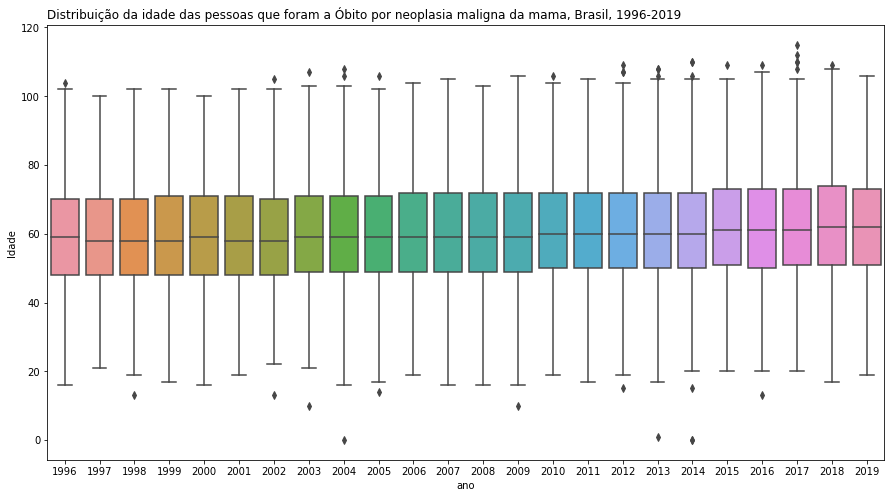

In [ ]:
# Definindo o tamanho da figura
fig, ax = plt.subplots(figsize =(15, 8))

# Desenhando o Boxplot
ax = sns.boxplot(
    data = ocm_desagregado,
    x="ano", 
    y="idade" 
)

# Inserindo o título
ax.set_title(
    label = 'Distribuição da idade das pessoas que foram a Óbito por neoplasia maligna da mama, Brasil, 1996-2019', 
    loc ='left'
)

# Inserindo rótulos dos eixos
plt.xlabel("ano")
plt.ylabel("Idade")

# Exibindo o gráfico
plt.show()

In [ ]:
# Criando a tabela com distribuição dos óbitos por raca_cor
tab_idade_ano = ocm_desagregado\
  .groupby('ano', as_index = True)\
  .agg({"idade": "mean"})\
  .reset_index()

# Espiando o resultado
tab_idade_ano

,ano,idade
0,1996,59.097216
1,1997,59.034514
2,1998,59.291579
3,1999,59.275934
4,2000,59.432046
5,2001,59.551310
6,2002,59.504353
7,2003,60.079596
8,2004,59.916354
9,2005,60.141605


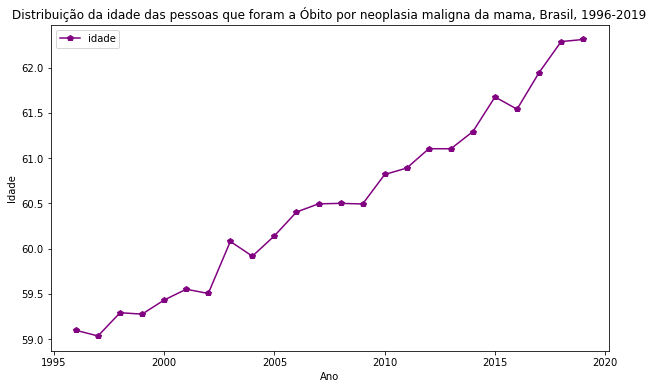

In [ ]:
# Gráfico de linhas da idade ao longo do tempo
tab_idade_ano.plot.line(
    x="ano", 
    y="idade",
    color = 'purple',
    marker='p',
    figsize=(10, 6),
    ylabel='Idade',
    xlabel='Ano',
    title = 'Distribuição da idade das pessoas que foram a Óbito por neoplasia maligna da mama, Brasil, 1996-2019',
);

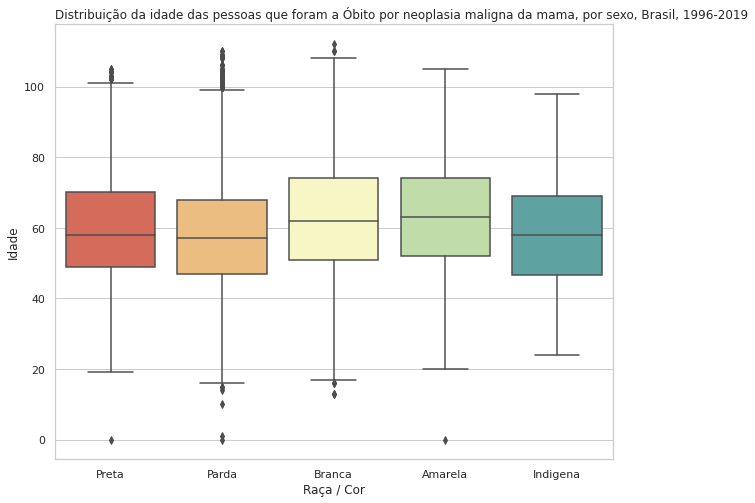

In [ ]:
# Definindo o tamanho da figura
fig, ax = plt.subplots(figsize =(10, 8))

# Desenhando o Boxplot
ax = sns.boxplot(
    data = ocm_desagregado,
    x="raca_cor_label", 
    y="idade",
    palette = 'Spectral' 
)

# Inserindo o título
ax.set_title(
    label = 'Distribuição da idade das pessoas que foram a Óbito por neoplasia maligna da mama, por sexo, Brasil, 1996-2019', 
    loc ='left'
)

# Inserindo rótulos dos eixos
plt.xlabel("Raça / Cor")
plt.ylabel("Idade")

# Exibindo o gráfico
plt.show()

In [ ]:
# Criando a tabela com distribuição da idade por raca_cor das pessoas que vieraram a óbito 
tab_idade_raca = ocm_desagregado\
  .groupby('raca_cor_label', as_index = True)\
  .agg({"idade": "mean"})\
  .reset_index()

# Espiando o resultado
tab_idade_raca

,raca_cor_label,idade
0,Amarela,63.393209
1,Branca,62.235565
2,Indigena,58.312757
3,Parda,57.911605
4,Preta,59.377937


In [ ]:
# Criando a tabela com distribuição da idade por raca_cor das pessoas que vieraram a óbito 
ocm_desagregado\
  .filter(items=['raca_cor_label','idade'])\
  .groupby('raca_cor_label', as_index = True)\
  .describe()

idade                                                     
                   count       mean        std   min   25%   50%   75%    max
raca_cor_label                                                               
Amarela           2032.0  63.393209  15.049481   0.0  52.0  63.0  74.0  105.0
Branca          170492.0  62.235565  15.229327  13.0  51.0  62.0  74.0  112.0
Indigena           243.0  58.312757  15.673348  24.0  46.5  58.0  69.0   98.0
Parda            67119.0  57.911605  14.680195   0.0  47.0  57.0  68.0  110.0
Preta            19363.0  59.377937  14.648610   0.0  49.0  58.0  70.0  105.0

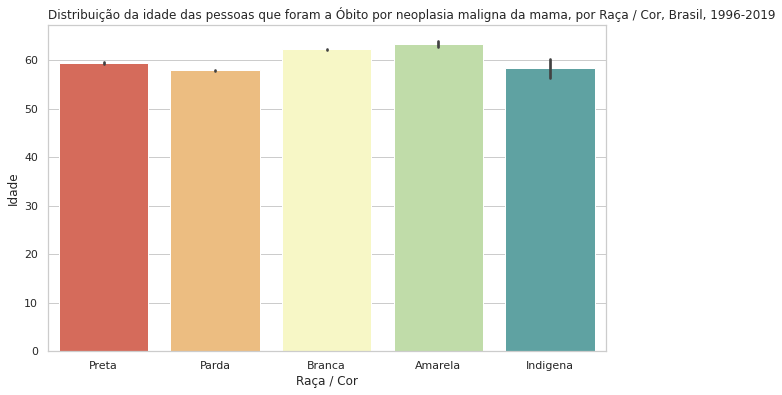

In [ ]:
# Definindo o tamanho da figura
fig, ax = plt.subplots(figsize =(10, 6))

# Desenhando o Boxplot
ax = sns.barplot(
    data=ocm_desagregado, 
    x="raca_cor_label", 
    y="idade",
    palette = 'Spectral' 
)

# Inserindo o título
ax.set_title(
    label = 'Distribuição da idade das pessoas que foram a Óbito por neoplasia maligna da mama, por Raça / Cor, Brasil, 1996-2019', 
    loc ='left'
)

# Inserindo rótulos dos eixos
plt.xlabel("Raça / Cor")
plt.ylabel("Idade")

# Exibindo o gráfico
plt.show()

##### **Óbitos decorrente câncer de mama por Unidade da Federação no Brasil em 2019**

###### **1. Organização dos dados geoespaciais**

In [ ]:
#Instalando o Geopandas
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 4.6 MB/s 
     |████████████████████████████████| 16.7 MB 576 kB/s 
     |████████████████████████████████| 6.3 MB 37.5 MB/s 


In [ ]:
# Importando bibliotecas necessárias
import geopandas as gpd
import json

In [ ]:
# Pegando o geojson
url_geojson = 'https://raw.githubusercontent.com/jonates/opendata/master/arquivos_geoespaciais/unidades_da_federacao.json'
geo_uf = gpd.read_file(url_geojson)

In [ ]:
# Espiando a estrutura do objeto
geo_uf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   NM_ESTADO  27 non-null     object  
 1   NM_REGIAO  27 non-null     object  
 2   CD_GEOCUF  27 non-null     object  
 3   geometry   27 non-null     geometry
dtypes: geometry(1), object(3)
memory usage: 992.0+ bytes


In [ ]:
#Espiando o objeto geoespacial
geo_uf.head()

,NM_ESTADO,NM_REGIAO,CD_GEOCUF,geometry
0,ACRE,NORTE,12,"POLYGON ((-66.81025 -9.81805, -66.62672 -9.898..."
1,ALAGOAS,NORDESTE,27,"POLYGON ((-35.15253 -8.91384, -35.30432 -9.190..."
2,AMAPÁ,NORTE,16,"POLYGON ((-50.09391 0.70209, -50.27176 0.68823..."
3,AMAZONAS,NORTE,13,"POLYGON ((-63.37209 2.21186, -63.27635 2.15439..."
4,BAHIA,NORDESTE,29,"POLYGON ((-38.23759 -9.32979, -38.23654 -9.331..."


###### **2. Organização do dataframe**

In [ ]:
# Criando a tabela com distribuição dos óbitos por raca_cor
tab_uf = ocm.query('ano==2019')\
  .groupby('sigla_uf', as_index = True)\
  .agg({"numero_obitos": "sum"})\
  .sort_values('numero_obitos')\
  .reset_index()

# Espiando o resultado
tab_uf

,sigla_uf,numero_obitos
0,RR,24
1,AP,25
2,AC,34
3,TO,70
4,RO,93
5,SE,177
6,AM,187
7,MT,202
8,AL,208
9,PI,211


In [ ]:
# Inserindo o codigo da UF no dataset
tab_uf['CD_GEOCUF'] = tab_uf['sigla_uf']\
  .replace(
      ['RO','AC','AM','RR','PA','AP','TO','MA','PI','CE','RN','PB','PE','AL','SE','BA','MG','ES','RJ','SP','PR','SC','RS','MS','MT','GO','DF'],
      ['11','12','13','14','15','16','17','21','22','23','24','25','26','27','28','29','31','32','33','35','41','42','43','50','51','52','53']
  )

# Espiando a tabela
tab_uf.head(5)  

,sigla_uf,numero_obitos,CD_GEOCUF
0,RR,24,14
1,AP,25,16
2,AC,34,12
3,TO,70,17
4,RO,93,11


In [ ]:
# Levando os dados para dentro do objeto geoespacial
geo_uf = geo_uf.merge(tab_uf, on='CD_GEOCUF')

#Espiando resultado
geo_uf.head()

,NM_ESTADO,NM_REGIAO,CD_GEOCUF,geometry,sigla_uf,numero_obitos
0,ACRE,NORTE,12,"POLYGON ((-66.81025 -9.81805, -66.62672 -9.898...",AC,34
1,ALAGOAS,NORDESTE,27,"POLYGON ((-35.15253 -8.91384, -35.30432 -9.190...",AL,208
2,AMAPÁ,NORTE,16,"POLYGON ((-50.09391 0.70209, -50.27176 0.68823...",AP,25
3,AMAZONAS,NORTE,13,"POLYGON ((-63.37209 2.21186, -63.27635 2.15439...",AM,187
4,BAHIA,NORDESTE,29,"POLYGON ((-38.23759 -9.32979, -38.23654 -9.331...",BA,1064


In [ ]:
# Verificando mínimo e máximo para definir range do mapa
tab_uf.numero_obitos.describe()

count      27.000000
mean      677.444444
std       981.468497
min        24.000000
25%       194.500000
50%       272.000000
75%       801.500000
max      4706.000000
Name: numero_obitos, dtype: float64

###### **3. Elaboração do Mapa**

In [ ]:
# Importando as bibliotecas necessarias
import plotly.express as px

In [ ]:
# Criando o mapa
mapa_uf = px.choropleth_mapbox(
    data_frame = tab_uf, 
    geojson = geo_uf, 
    locations='CD_GEOCUF', 
    featureidkey='properties.CD_GEOCUF',
    color='numero_obitos',
    color_continuous_scale= 'RdPu', # escolha paletas de cores https://plotly.com/python/colorscales/
    range_color=(0, 4800),
    mapbox_style="open-street-map",
    zoom=2.5, 
    center = {"lat": -17.14, "lon": -57.33},
    opacity=0.7,
    labels={'numero_obitos':'Óbitos', 
            'CD_GEOCUF' : 'Unidades da Federação'
    },
    width = 800,
    height = 600
)

In [ ]:
# Ajustando as margens
mapa_uf.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

# Exibindo o mapa
mapa_uf.show()

## **Considerações Finais**

- https://plotly.com/
- https://matplotlib.org/
- https://bokeh.org/
- https://seaborn.pydata.org/
- https://altair-viz.github.io/
- https://pandas.pydata.org/docs/user_guide/visualization.html
- https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html
- https://github.com/python-visualization/folium